# **Practice Test for Pandas**
> Prepared by: Jima Del Rosario

Congratulations on finishing our session on Pandas - From Basics to Intermediate.

We hope you gained knowledge on how we can use it to work with structured data efficiently and simplify complex data handling tasks. Now, there is no better way to strengthen that knowledge than to practice and practice AND PRACTICE!


In this **Practice Test**, you are to use what you learned in our Pandas workshop to finish the tasks below.

You are provided with two separate `.csv` files namely `orders.csv` and `inventory.csv`.

For `orders.csv` perform:
- Basic Data Exploration
- Handle Missing Values *(hint: to delete a column you can also use del df['column'])*
- Fix Data Types *(hint: date columns in the given dataset are in dayfirst format)*
- Clean Text Data

For `inventory.csv` perform:
- Fix Data Type of Price Column *(hint: remove '$' and ',' first)*


    note: don't have to remove duplicates for both dataset.

Once both datasets are cleaned:
- Merge/Join them through `Product` and `Product ID` column.
- Convert the resulting DataFrame into a new `.csv` with file name `orderdetails.csv`.

With the new DataFrame, answer the following questions:

##### **Product Insights**

Which product categories (e.g., Furniture, Office) are most frequently sold?

    clue: group the data by product categories and use .size() to get total number of rows for each category

##### **Customer Insights**

Which are the top 5 states that generate the most orders or revenue?

    clue: group the data by states and get sum of price for each group

##### **Order Insights**

Which shipping class is most frequently used, and how does it correlate with customer type (Consumer, Corporate)?

    clue: group the data by shipping mode and customer type, then get total number of rows for each category/sub-category

## **Step 1:  Basic Data Exploration**

In [169]:
import pandas as pd

In [170]:
orders = pd.read_csv('orders.csv', encoding='latin-1')
inventory = pd.read_csv('inventory.csv', encoding='latin-1')

In [171]:
orders.shape

(9730, 17)

In [172]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9730 entries, 0 to 9729
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9700 non-null   object 
 1   order date     9700 non-null   object 
 2   Ship Date      9700 non-null   object 
 3   Ship Mode      9700 non-null   object 
 4   Customer ID    9700 non-null   object 
 5   customer name  9700 non-null   object 
 6   Segment        9700 non-null   object 
 7   country        9700 non-null   object 
 8   City           9700 non-null   object 
 9   State          9700 non-null   object 
 10  Region         9700 non-null   object 
 11  Product ID     9700 non-null   object 
 12  Unnamed: 12    0 non-null      float64
 13  Unnamed: 13    0 non-null      float64
 14  Unnamed: 14    0 non-null      float64
 15  Unnamed: 15    0 non-null      float64
 16  #CALC!         0 non-null      float64
dtypes: float64(5), object(12)
memory usage: 1.3+ MB


In [173]:
orders.nunique()

,0
Order ID,4920
order date,1230
Ship Date,1326
Ship Mode,4
Customer ID,793
customer name,793
Segment,3
country,1
City,529
State,49


## **Step 2: Handle Missing Values**

In [174]:
orders.isna().sum()

,0
Order ID,30
order date,30
Ship Date,30
Ship Mode,30
Customer ID,30
customer name,30
Segment,30
country,30
City,30
State,30


In [175]:
orders.isna().sum().sum()

49010

In [176]:
orders.dropna(how='all', inplace=True)

In [177]:
orders.isna().sum().sum()

48500

In [178]:
del orders['Unnamed: 12']

In [179]:
del orders['Unnamed: 13']

In [180]:
del orders['Unnamed: 14']

In [181]:
del orders['Unnamed: 15']

In [182]:
del orders['#CALC!']

In [183]:
orders.isna().sum().sum()

0

## **Step 3:  Fix Data Types**

In [184]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9700 entries, 0 to 9729
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order ID       9700 non-null   object
 1   order date     9700 non-null   object
 2   Ship Date      9700 non-null   object
 3   Ship Mode      9700 non-null   object
 4   Customer ID    9700 non-null   object
 5   customer name  9700 non-null   object
 6   Segment        9700 non-null   object
 7   country        9700 non-null   object
 8   City           9700 non-null   object
 9   State          9700 non-null   object
 10  Region         9700 non-null   object
 11  Product ID     9700 non-null   object
dtypes: object(12)
memory usage: 985.2+ KB


In [185]:
orders.head(10)

,Order ID,order date,Ship Date,Ship Mode,Customer ID,customer name,Segment,country,City,State,Region,Product ID
0,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,claire gute,Consumer,united states,Henderson,Kentucky,South,TEC-MA-10004458
1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,claire gute,Consumer,united states,Henderson,Kentucky,South,TEC-MA-10002412
2,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,darrin van huff,Corporate,united states,Los Angeles,California,West,TEC-AC-10002380
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,sean o'donnell,Consumer,united states,Fort Lauderdale,Florida,South,TEC-MA-10004552
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,sean o'donnell,Consumer,united states,Fort Lauderdale,Florida,South,OFF-FA-10000089
5,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,brosina hoffman,Consumer,united states,Los Angeles,California,West,OFF-PA-10001246
6,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,brosina hoffman,Consumer,united states,Los Angeles,California,West,TEC-PH-10001949
8,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,brosina hoffman,Consumer,united states,Los Angeles,California,West,OFF-AR-10003477
9,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,brosina hoffman,Consumer,united states,Los Angeles,California,West,TEC-MA-10002981
10,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,brosina hoffman,Consumer,united states,Los Angeles,California,West,OFF-PA-10000210


In [186]:
orders['order date'] = pd.to_datetime(orders['order date'], dayfirst=True)

In [187]:
orders['order date'].head(10)

,order date
0,2017-11-08
1,2017-11-08
2,2017-06-12
3,2016-10-11
4,2016-10-11
5,2015-06-09
6,2015-06-09
8,2015-06-09
9,2015-06-09
10,2015-06-09


In [188]:
orders['Ship Date'] = pd.to_datetime(orders['Ship Date'], dayfirst=True)

In [189]:
orders['Ship Date'].head(10)

,Ship Date
0,2017-11-11
1,2017-11-11
2,2017-06-16
3,2016-10-18
4,2016-10-18
5,2015-06-14
6,2015-06-14
8,2015-06-14
9,2015-06-14
10,2015-06-14


In [190]:
orders['Ship Mode'] = orders['Ship Mode'].astype('category')
orders['Segment'] = orders['Segment'].astype('category')
orders['country'] = orders['country'].astype('category')
orders['Region'] = orders['Region'].astype('category')

In [191]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9700 entries, 0 to 9729
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9700 non-null   object        
 1   order date     9700 non-null   datetime64[ns]
 2   Ship Date      9700 non-null   datetime64[ns]
 3   Ship Mode      9700 non-null   category      
 4   Customer ID    9700 non-null   object        
 5   customer name  9700 non-null   object        
 6   Segment        9700 non-null   category      
 7   country        9700 non-null   category      
 8   City           9700 non-null   object        
 9   State          9700 non-null   object        
 10  Region         9700 non-null   category      
 11  Product ID     9700 non-null   object        
dtypes: category(4), datetime64[ns](2), object(6)
memory usage: 720.6+ KB


In [192]:
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product ID    108 non-null    object
 1   Category      108 non-null    object
 2   Sub-Category  108 non-null    object
 3   Product Name  108 non-null    object
 4   Price         108 non-null    object
dtypes: object(5)
memory usage: 4.3+ KB


In [193]:
inventory.head(2)

,Product ID,Category,Sub-Category,Product Name,Price
0,FUR-BO-10000112,Furniture,Bookcases,"Bush Birmingham Collection Bookcase, Dark Cherry",$825.17
1,FUR-BO-10001567,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Dark Cher...",$90.88


In [194]:
inventory['Price'] = inventory['Price'].str.replace('$', '')
inventory['Price'] = inventory['Price'].str.replace(',', '')

In [195]:
inventory['Price'] = pd.to_numeric(inventory['Price'])

In [196]:
inventory.head(2)

,Product ID,Category,Sub-Category,Product Name,Price
0,FUR-BO-10000112,Furniture,Bookcases,"Bush Birmingham Collection Bookcase, Dark Cherry",825.17
1,FUR-BO-10001567,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Dark Cher...",90.88


## **Step 4: Clean Text Data**

In [197]:
orders.head(2)

,Order ID,order date,Ship Date,Ship Mode,Customer ID,customer name,Segment,country,City,State,Region,Product ID
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,claire gute,Consumer,united states,Henderson,Kentucky,South,TEC-MA-10004458
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,claire gute,Consumer,united states,Henderson,Kentucky,South,TEC-MA-10002412


In [198]:
orders['customer name'] = orders['customer name'].str.title()

In [199]:
orders['country'] = orders['country'].str.title()

In [200]:
orders.rename(columns={'country':'Country', 'customer name':'Customer Name', 'order date':'Order Date'}, inplace=True)

In [201]:
orders.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,TEC-MA-10004458
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,TEC-MA-10002412


## **Step 5: Merging orders.csv and inventory.csv**

In [202]:
orderdetails = orders.merge(inventory, how='left')

In [203]:
orderdetails

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Price
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,TEC-MA-10004458,Technology,Machines,Lexmark X 9575 Professional All-in-One Color P...,396.00
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.48
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,TEC-AC-10002380,Technology,Accessories,Sony 8GB Class 10 Micro SDHC R40 Memory Card,27.19
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,TEC-MA-10004552,Technology,Machines,Star Micronics TSP100 TSP143LAN Receipt Printer,1035.80
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-FA-10000089,Office Supplies,Fasteners,Acco Glide Clips,19.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,Central,TEC-MA-10001031,Technology,Machines,Socket Bluetooth Cordless Hand Scanner (CHS),506.28
9696,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,East,FUR-FU-10003798,Furniture,Furnishings,"Ultra Door Kickplate, 8""H x 34""W",79.12
9697,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,East,OFF-AP-10000326,Office Supplies,Appliances,Belkin 7 Outlet SurgeMaster Surge Protector wi...,157.92
9698,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,East,TEC-MA-10001016,Technology,Machines,Canon PC170 Desktop Personal Copier,287.91


## **Step 6: Answering Business Questions**

### **Product Insights**

Which product categories (e.g., Furniture, Office) are most frequently sold?

In [204]:
product_cat = orderdetails.groupby('Category').size()

In [205]:
product_cat.sort_values(ascending=False)

,0
Category,
Technology,4742
Office Supplies,4151
Furniture,807


### **Customer Insights**

Which are the top 5 states that generate the most orders or revenue?


In [206]:
revenue_states = orderdetails.groupby('State')['Price'].sum()

In [207]:
revenue_states.sort_values(ascending=False)

,Price
State,
California,1388162.26
New York,684741.88
Texas,669953.67
Pennsylvania,417161.13
Ohio,383869.07
Washington,344649.77
Illinois,245054.71
Florida,190338.95
Michigan,190033.79


In [208]:
top5_states = revenue_states.head(5)

### **Order Insights**

Which shipping mode is most frequently used, and how does it correlate with customer type (Consumer, Corporate)?

In [209]:
ship_mode = orderdetails.groupby(['Ship Mode', 'Segment']).size()

<ipython-input-209-673b3d7a0a43>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ship_mode = orderdetails.groupby(['Ship Mode', 'Segment']).size()


In [210]:
ship_mode

Ship Mode       Segment    
First Class     Consumer        750
                Corporate       463
                Home Office     274
Same Day        Consumer        306
                Corporate       114
                Home Office     111
Second Class    Consumer        993
                Corporate       583
                Home Office     307
Standard Class  Consumer       3002
                Corporate      1762
                Home Office    1035
dtype: int64

## **Step 6: Visualize**

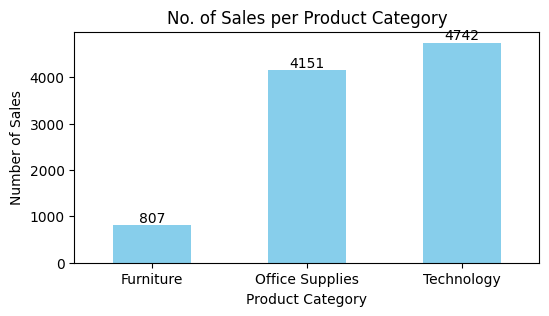

In [212]:
# Which product categories (e.g., Furniture, Office) are most frequently sold?
ax1 = product_cat.plot(kind='bar',
                       title='No. of Sales per Product Category',
                       figsize=(6, 3),
                       color='skyblue',
                       rot=0)
ax1.set_xlabel('Product Category')
ax1.set_ylabel('Number of Sales')

for i, v in enumerate(product_cat):
    ax1.text(i, v, f'{v}', ha='center', va='bottom')

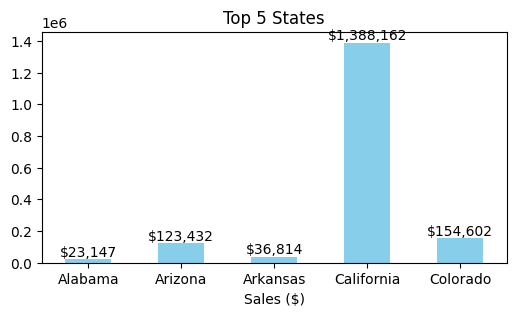

In [215]:
# Which are the top 5 states that generate the most revenue?
ax1 = top5_states.plot(kind='bar',
                       title='Top 5 States',
                       figsize=(6, 3),
                       color='skyblue',
                       rot=0)
ax1.set_xlabel('Sales ($)')

for i, v in enumerate(top5_states):
    ax1.text(i, v, f'${v:,.0f}', ha='center', va='bottom')

Text(0.5, 1.0, 'Total Orders by Ship Mode and Segment')

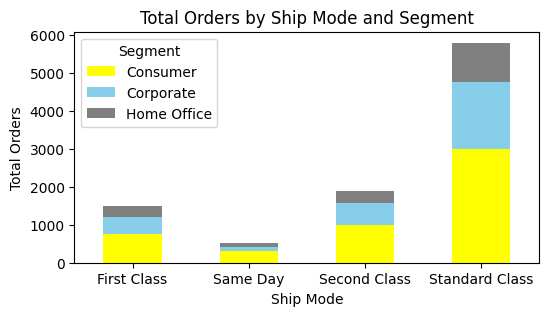

In [218]:
# Which shipping mode is most frequently used, and how does it correlate with customer type?
ax1 = ship_mode.unstack().plot(kind='bar',
                               stacked=True,
                               figsize=(6, 3),
                               color=['yellow', 'skyblue', 'gray'],
                               rot=0)
ax1.set_ylabel('Total Orders')
ax1.set_xlabel('Ship Mode')
ax1.set_title('Total Orders by Ship Mode and Segment')